In [1]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


/home/dpastorm/catkin_ws/src/bintel


In [3]:

import osqp
import numpy as np
import scipy as sp
import scipy.sparse as sparse
import matplotlib.pyplot as plt
import time
import matplotlib.cm as cm


# Discrete time model of a quadcopter
Ad = sparse.csc_matrix([
  [1.,      0.,     0., 0., 0., 0., 0.1,     0.,     0.,  0.,     0.,     0.    ],
  [0.,      1.,     0., 0., 0., 0., 0.,      0.1,    0.,  0.,     0.,     0.    ],
  [0.,      0.,     1., 0., 0., 0., 0.,      0.,     0.1, 0.,     0.,     0.    ],
  [0.0488,  0.,     0., 1., 0., 0., 0.0016,  0.,     0.,  0.0992, 0.,     0.    ],
  [0.,     -0.0488, 0., 0., 1., 0., 0.,     -0.0016, 0.,  0.,     0.0992, 0.    ],
  [0.,      0.,     0., 0., 0., 1., 0.,      0.,     0.,  0.,     0.,     0.0992],
  [0.,      0.,     0., 0., 0., 0., 1.,      0.,     0.,  0.,     0.,     0.    ],
  [0.,      0.,     0., 0., 0., 0., 0.,      1.,     0.,  0.,     0.,     0.    ],
  [0.,      0.,     0., 0., 0., 0., 0.,      0.,     1.,  0.,     0.,     0.    ],
  [0.9734,  0.,     0., 0., 0., 0., 0.0488,  0.,     0.,  0.9846, 0.,     0.    ],
  [0.,     -0.9734, 0., 0., 0., 0., 0.,     -0.0488, 0.,  0.,     0.9846, 0.    ],
  [0.,      0.,     0., 0., 0., 0., 0.,      0.,     0.,  0.,     0.,     0.9846]
])
Bd = sparse.csc_matrix([
  [0.,      -0.0726,  0.,     0.0726],
  [-0.0726,  0.,      0.0726, 0.    ],
  [-0.0152,  0.0152, -0.0152, 0.0152],
  [-0.,     -0.0006, -0.,     0.0006],
  [0.0006,   0.,     -0.0006, 0.0000],
  [0.0106,   0.0106,  0.0106, 0.0106],
  [0,       -1.4512,  0.,     1.4512],
  [-1.4512,  0.,      1.4512, 0.    ],
  [-0.3049,  0.3049, -0.3049, 0.3049],
  [-0.,     -0.0236,  0.,     0.0236],
  [0.0236,   0.,     -0.0236, 0.    ],
  [0.2107,   0.2107,  0.2107, 0.2107]])
[nx, nu] = Bd.shape

# Sizes
ns = 12
nu = 4
N = 5

# Objective function
Q = sparse.diags([0., 0., 10., 10., 10., 10., 0., 0., 0., 5., 5., 5.])

# Initial and reference states
x0 = np.array([0.,0.,2.,0.,0.,0.,0.,0.,0.,0.,0.,0.])
xr = np.linspace(0,10,ns) #np.array([0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.])
xr_1 = xr.reshape(xr.shape[0],-1).shape
xrtrj = np.kron(np.ones(N), xr.reshape(xr.shape[0],-1))
xrflat = xrtrj.flatten('F')

Play with xr to get different shapes

In [9]:
print(xr.shape)
print(xr_1)
print('kron with ones and xr(nx,1): {}'.format(xrtrj.shape))
print(xrflat.shape)
print(np.tile(xr,N).shape)
print('simple kron with ones I(N,), stacking {}'.format(np.kron(np.ones(N),xr).shape))
print(np.hstack([xrflat]).shape)

(12,)
(12, 1)
kron with ones and xr(nx,1): (12, 5)
(60,)
(60,)
simple kron with ones I(N,), stacking (60,)
(60,)


Plot all the flat vectors to check how they look. 

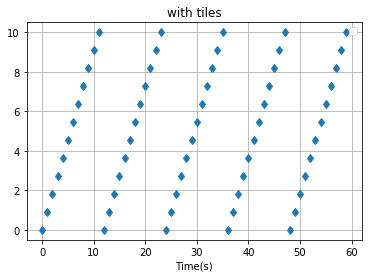

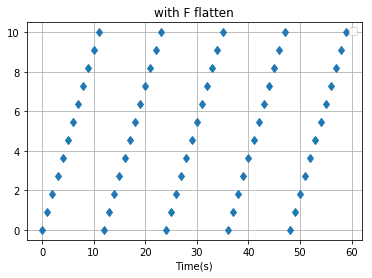

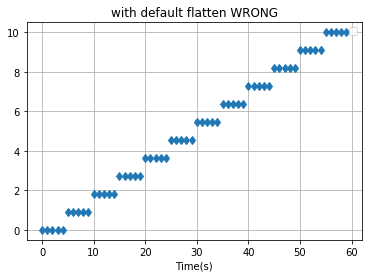

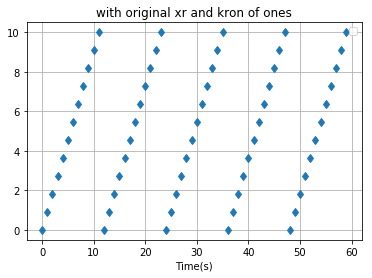

In [29]:
# Plot results
plt.plot(np.tile(xr,N),'d')
plt.xlabel('Time(s)')
plt.title("with tiles")
plt.grid()
plt.legend()
plt.show()    

# Plot results
plt.plot(xrtrj.flatten('F'),'d')
plt.xlabel('Time(s)')
plt.title("with F flatten")
plt.grid()
plt.legend()
plt.show()

# Plot results
plt.plot(xrtrj.flatten(),'d')
plt.title("with default flatten WRONG")
plt.xlabel('Time(s)')
plt.grid()
plt.legend()
plt.show()

# Plot results
plt.plot(np.kron(np.ones(N),xr),'d')
plt.title("with original xr and kron of ones")
plt.xlabel('Time(s)')
plt.grid()
plt.legend()
plt.show()
